In [ ]:
### clustring

!pip install mglearn
import mglearn
import numpy as np
import matplotlib.pyplot as plt

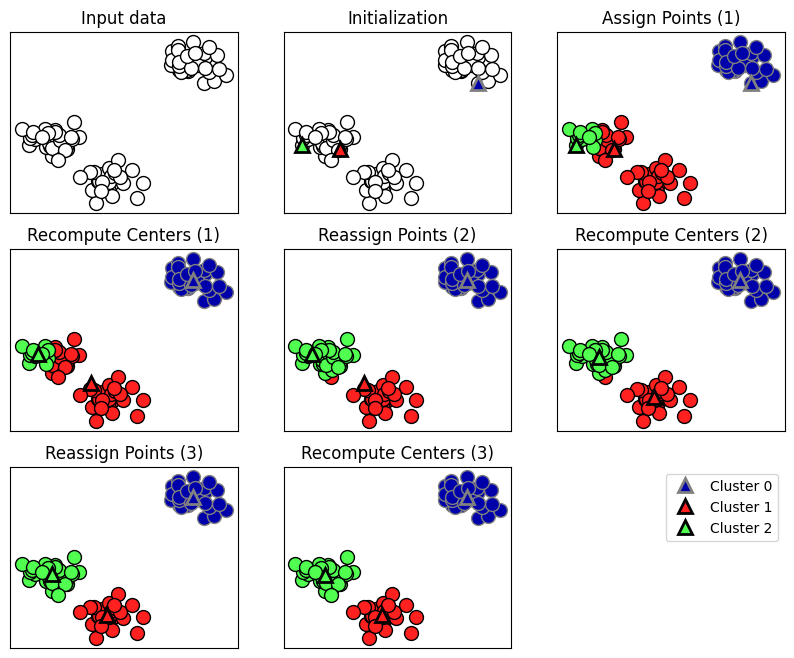

In [ ]:
mglearn.plots.plot_kmeans_algorithm()

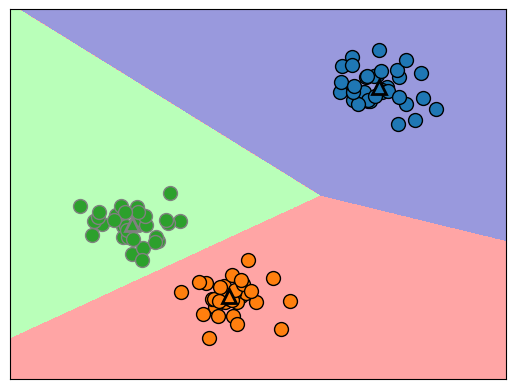

In [ ]:
mglearn.plots.plot_kmeans_boundaries()

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(random_state=1)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [ ]:
kmeans.labels_

array([1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2,
       0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0,
       1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1,
       2, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1], dtype=int32)

In [ ]:
kmeans.predict(X)

array([1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2,
       0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0,
       1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1,
       2, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1], dtype=int32)

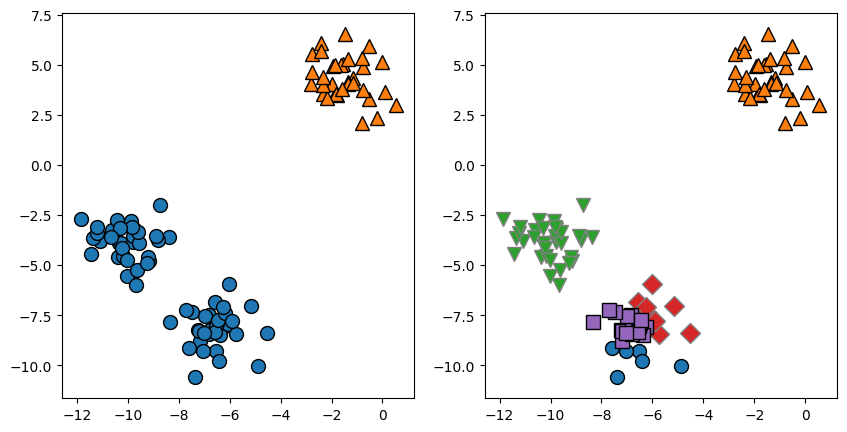

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])


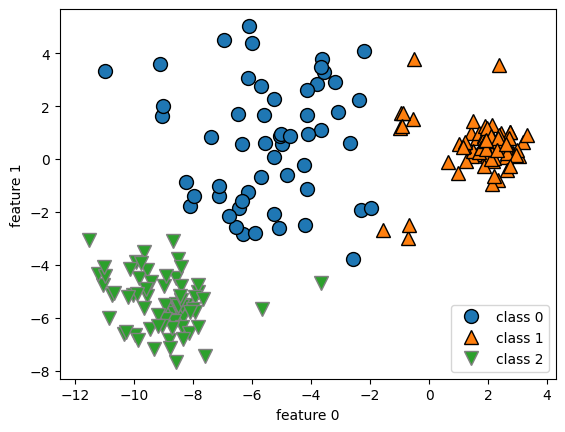

In [ ]:
x_varied, y_varied = make_blobs(n_samples=200,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=170)
y_varied = KMeans(n_clusters=3, random_state=5).fit_predict(x_varied)

mglearn.discrete_scatter(x_varied[:, 0], x_varied[:, 1], y_varied)
plt.legend(["class 0", "class 1", "class 2"], loc='best')
plt.xlabel("feature 0")
plt.ylabel("feature 1");

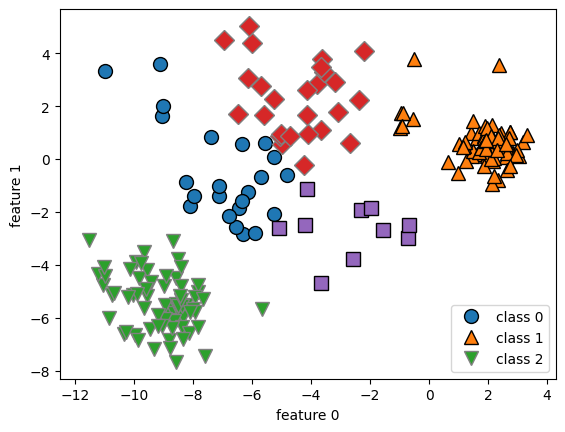

In [ ]:
y_varied = KMeans(n_clusters=5, random_state=5).fit_predict(x_varied)

mglearn.discrete_scatter(x_varied[:, 0], x_varied[:, 1], y_varied)
plt.legend(["class 0", "class 1", "class 2"], loc='best')
plt.xlabel("feature 0")
plt.ylabel("feature 1");

Text(0, 0.5, 'feature 1')

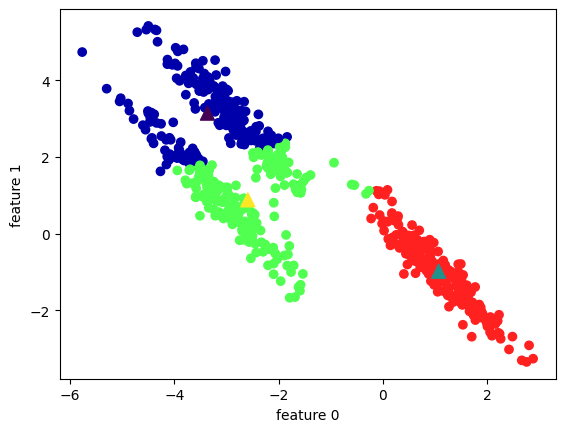

In [ ]:
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm3)
plt.xlabel("feature 0")
plt.ylabel("feature 1");
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[0, 1, 2], s=100)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

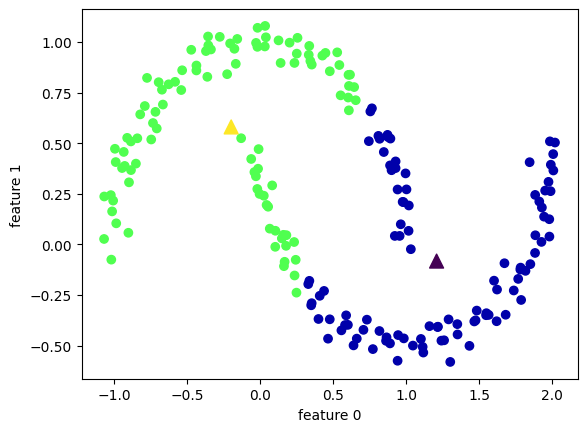

In [ ]:
### two moon dataset
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[0, 1], s=100)
plt.xlabel("feature 0")
plt.ylabel("feature 1");

In [ ]:
### vector quantization
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.decomposition import NMF, PCA
from sklearn.cluster import KMeans

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
X_people = people.data
y_people = people.target
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people,
                                                    random_state=0,
                                                    stratify=y_people)
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)

pca = PCA(n_components=15, whiten=True)
pca.fit(X_train)

kmeans = KMeans(n_clusters=15, random_state=0)
kmeans.fit(X_train)

x_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
x_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
x_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'nmf')

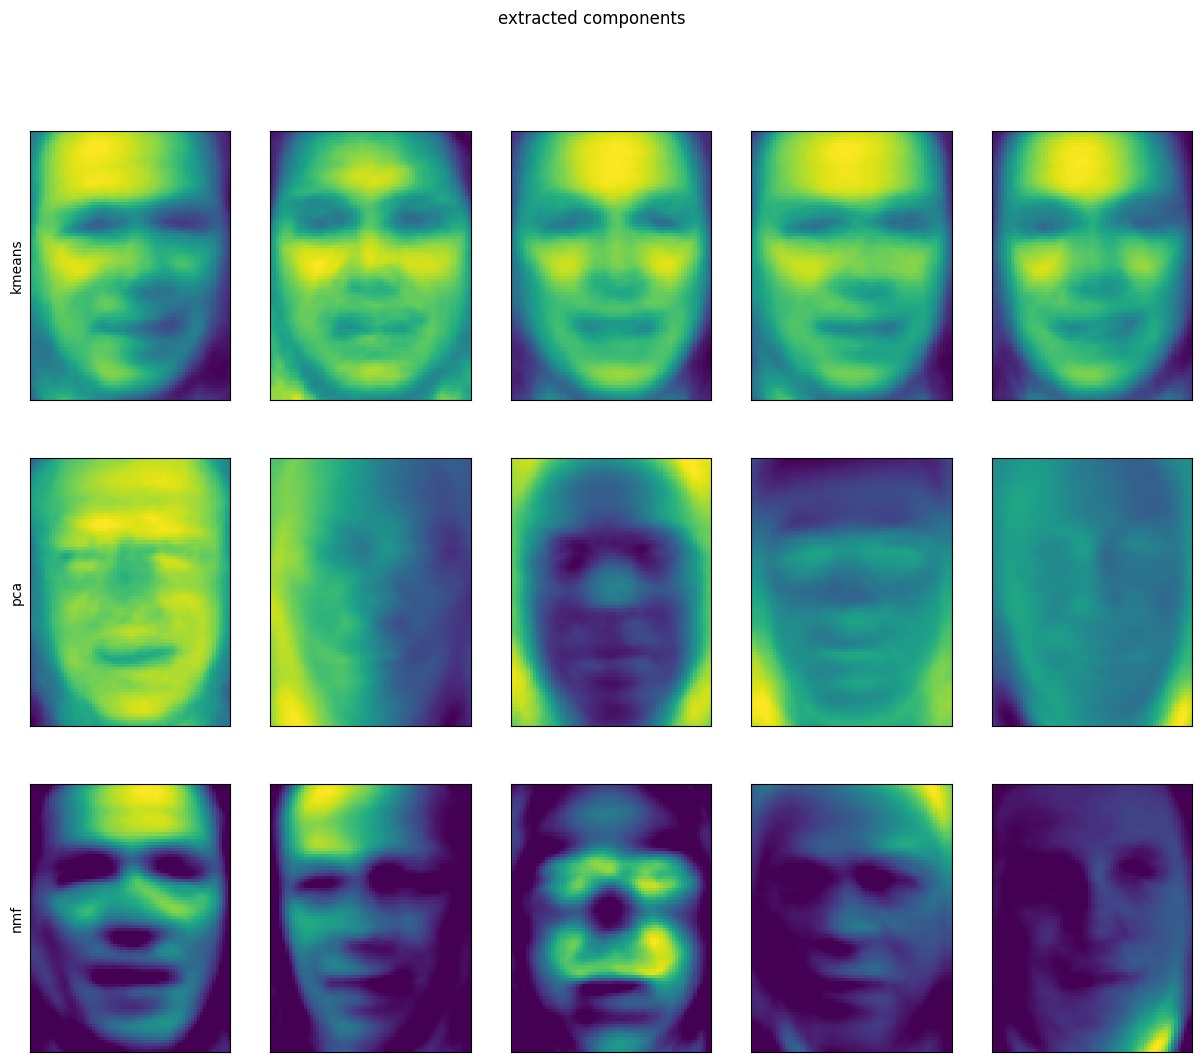

In [ ]:
fig , axes = plt.subplots(3, 5, figsize=(15, 12),
                          subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("extracted components")

for ax, comp_kmeans, comp_pca, comp_nmf in zip(axes.T,
                                          kmeans.cluster_centers_,
                                          pca.components_,
                                          nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape))
    ax[2].imshow(comp_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

Text(0, 0.5, 'nmf')

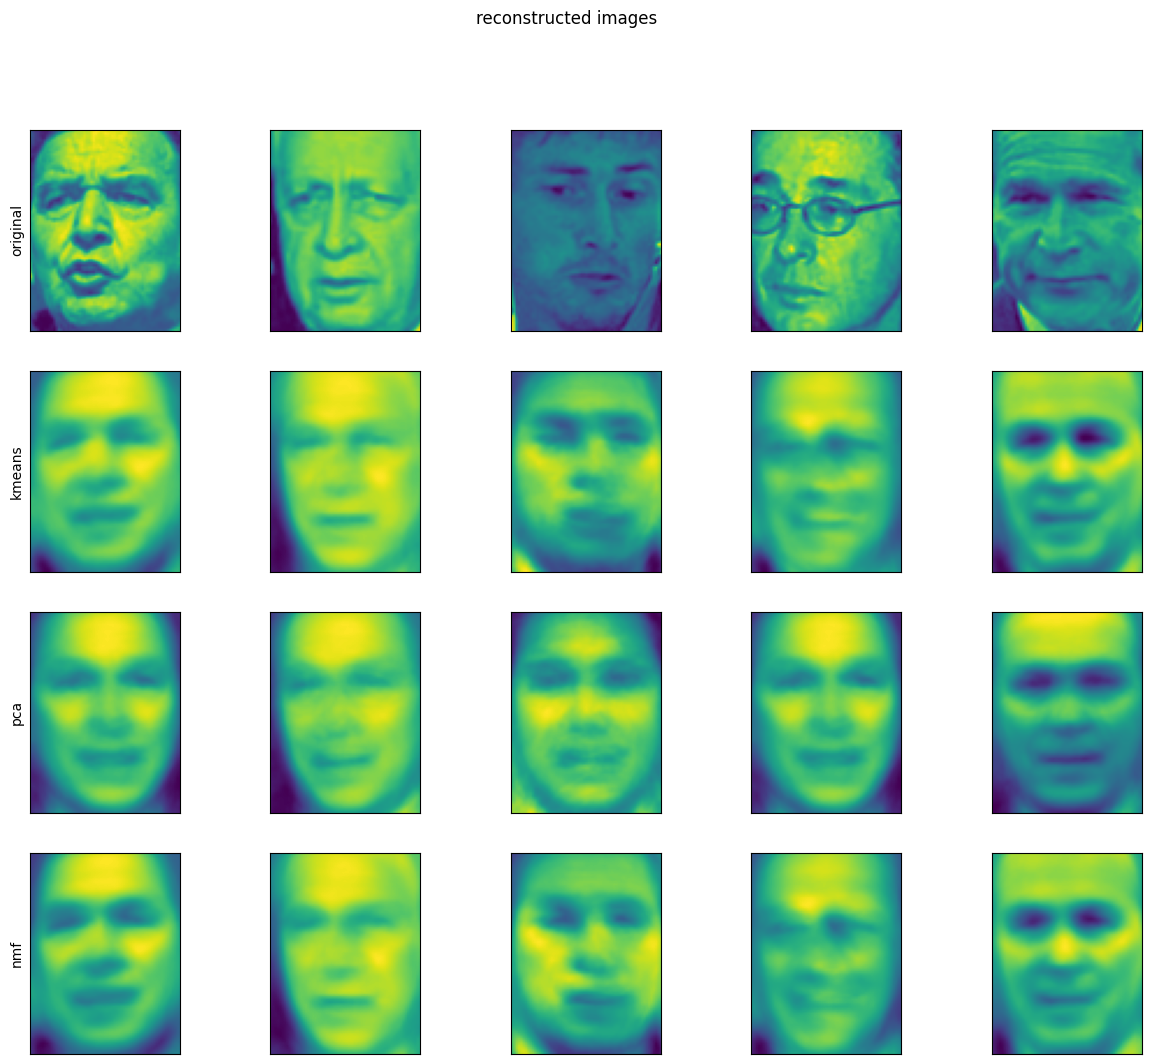

In [ ]:
fig, axes = plt.subplots(4, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("reconstructed images")
for ax, orig, rec_pca, rec_kmeans, rec_nmf in zip(axes.T,
                                                   X_test,
                                                   x_reconstructed_pca,
                                                   x_reconstructed_kmeans,
                                                   x_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_pca.reshape(image_shape))
    ax[2].imshow(rec_kmeans.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("original")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")

Cluster memberships:
[6 7 8 3 7 7 6 9 6 4 5 2 7 4 3 6 0 2 0 5 1 9 0 4 5 2 7 1 2 0 6 5 4 8 6 1 2
 6 3 8 9 5 0 8 7 5 6 3 2 9 5 2 1 3 4 6 0 4 0 5 2 3 7 6 4 3 5 7 0 3 9 3 9 8
 9 3 8 6 0 9 1 0 9 1 8 5 6 5 9 1 0 6 1 5 1 7 7 2 3 8 4 1 0 6 3 8 3 5 7 0 5
 0 0 3 6 4 0 1 9 6 6 3 8 0 8 3 6 2 4 1 6 5 3 2 4 7 4 3 1 6 2 8 0 5 5 6 2 4
 0 8 9 7 6 0 9 5 4 2 0 0 2 4 0 7 2 7 0 9 7 4 0 3 3 3 2 4 1 5 3 0 7 3 1 7 1
 0 5 9 3 5 3 0 6 6 8 5 1 2 0 7]


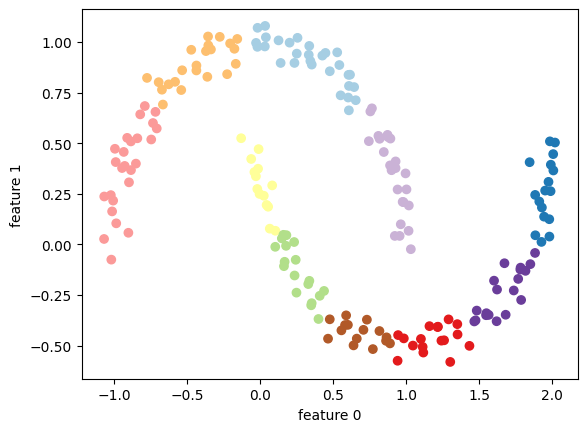

In [ ]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="Paired")
plt.xlabel("feature 0")
plt.ylabel("feature 1")
print("Cluster memberships:\n{}".format(y_pred))

In [ ]:
distance_features = kmeans.transform(X)
print("Shape of the distance features: {}".format(distance_features.shape))
print("Values for the first five observations:\n{}".format(distance_features[:5]))

Shape of the distance features: (200, 10)
Values for the first five observations:
[[0.61105725 1.16555129 0.8596498  1.73203024 1.05414595 1.29948197
  0.20114577 1.14060718 0.84595746 0.9673592 ]
 [1.81189898 0.72381874 1.38302653 2.63789762 0.44789648 2.40856339
  1.0130603  0.149581   1.74898421 0.94064733]
 [0.72740492 1.97438819 0.49225618 0.89349031 1.41145491 0.73639384
  0.9321221  1.76451208 0.02947096 0.99743586]
 [1.67841053 2.99397884 1.2810672  0.46433248 2.23605753 1.12858121
  1.97485609 2.69403293 1.08820953 1.73920619]
 [1.78590962 0.47125684 1.50902817 2.73062945 0.65810727 2.43798179
  0.9999798  0.12014483 1.82271872 1.11881729]]
